In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('file_with_attributes.csv')
df = pd.DataFrame(df)

In [3]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Unnamed: 0           0
pos                  0
artist_name          0
track_uri            0
track_name           3
playlist_pid         0
danceability        21
energy              21
key                 21
loudness            21
mode                21
speechiness         21
acousticness        21
instrumentalness    21
liveness            21
valence             21
tempo               21
type                21
id                  21
track_href          21
analysis_url        21
duration_ms         21
time_signature      21
dtype: int64


In [4]:
df = df.dropna(subset=['track_href', 'track_name'])
print("Handled missing values")
print(df.isnull().sum())

Handled missing values
Unnamed: 0          0
pos                 0
artist_name         0
track_uri           0
track_name          0
playlist_pid        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
# Converting columns to appropriate data types
df['pos'] = df['pos'].astype(int)
df['playlist_pid'] = df['playlist_pid'].astype(int)
df['duration_ms'] = df['duration_ms'].astype(int)

# Categorical columns
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['time_signature'] = df['time_signature'].astype('category')
df['type'] = df['type'].astype('category')

# Numerical columns that are likely already float, but just to be sure
float_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Text columns
text_columns = ['artist_name', 'track_uri', 'track_name', 'id', 'track_href', 'analysis_url']
for col in text_columns:
    df[col] = df[col].astype(str)
print(df.dtypes)

Unnamed: 0             int64
pos                    int64
artist_name           object
track_uri             object
track_name            object
playlist_pid           int64
danceability         float64
energy               float64
key                 category
loudness             float64
mode                category
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
type                category
id                    object
track_href            object
analysis_url          object
duration_ms            int64
time_signature      category
dtype: object


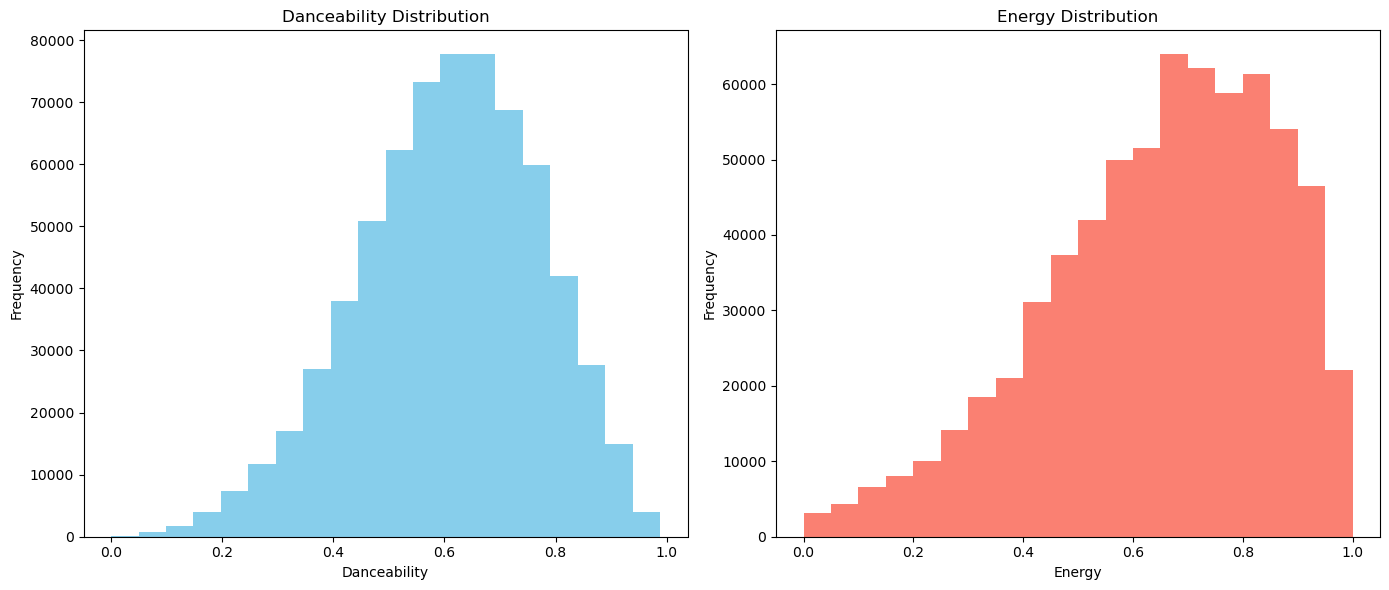

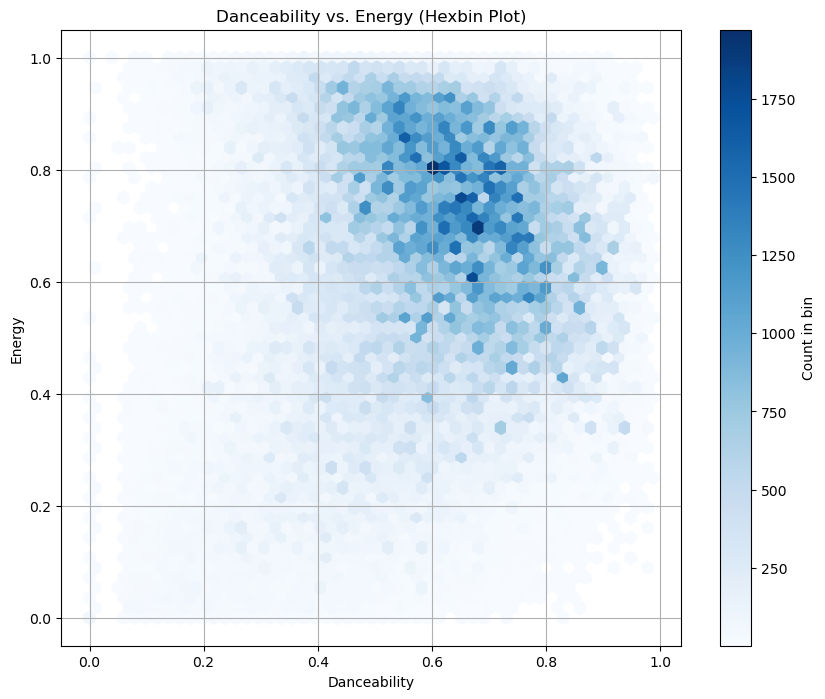

In [7]:
# Visualize the distribution of 'danceability' and 'energy'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['danceability'], bins=20, color='skyblue')
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['energy'], bins=20, color='salmon')
plt.title('Energy Distribution')
plt.xlabel('Energy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Let's plot a scatter plot with a regression line
# Plotting a hexbin plot for danceability vs energy
plt.figure(figsize=(10, 8))
plt.hexbin(df['danceability'], df['energy'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')

plt.title('Danceability vs. Energy (Hexbin Plot)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

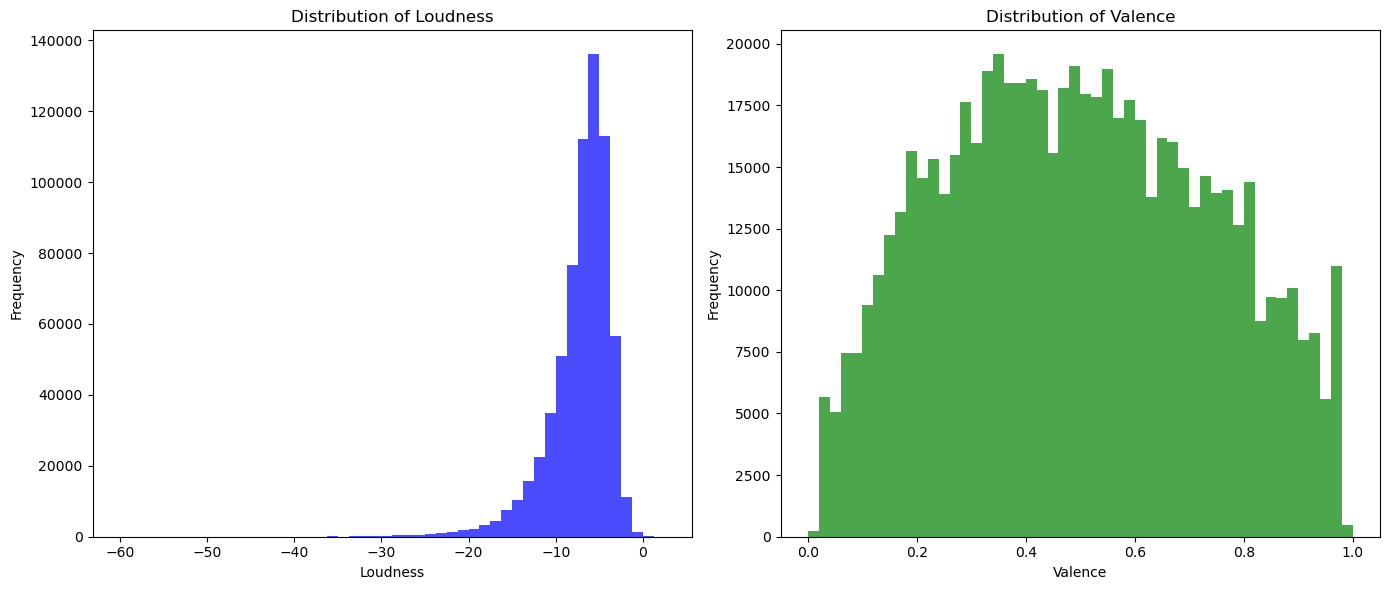

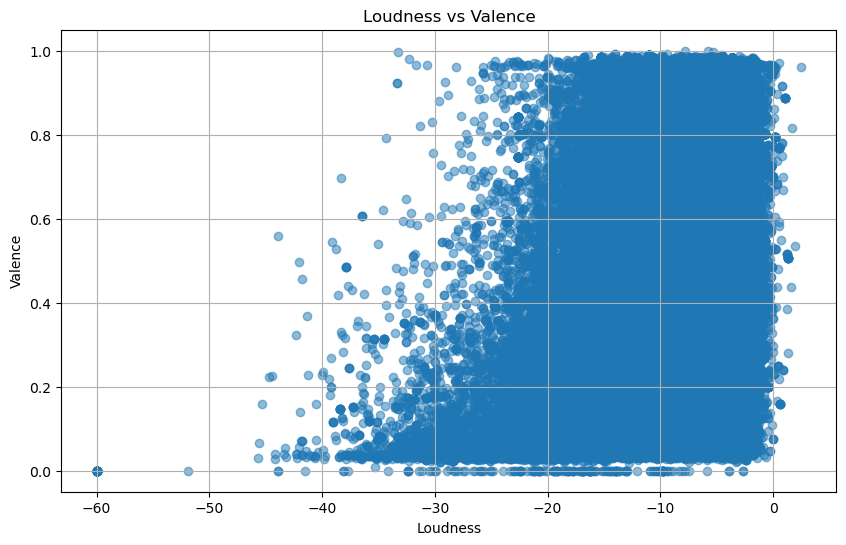

The correlation coefficient between loudness and valence is: 0.223006389548188


In [8]:
# Now let's look at the distribution of 'loudness' and 'valence'
plt.figure(figsize=(14, 6))

# First subplot for 'loudness'
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.hist(df['loudness'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Frequency')

# Second subplot for 'valence'
plt.subplot(1, 2, 2)
plt.hist(df['valence'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

# Now, let's plot a scatter plot to see the relationship between 'loudness' and 'valence'
plt.figure(figsize=(10, 6))
plt.scatter(df['loudness'], df['valence'], alpha=0.5)
plt.title('Loudness vs Valence')
plt.xlabel('Loudness')
plt.ylabel('Valence')
plt.grid(True)
plt.show()

# To check for statistical significance, you can conduct a correlation test
loudness_valence_corr = df['loudness'].corr(df['valence'])
print(f"The correlation coefficient between loudness and valence is: {loudness_valence_corr}")

# A correlation coefficient close to 1 or -1 means a strong relationship, 
# while a coefficient close to 0 means no linear relationship.